In [83]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
# Charger les données depuis le fichier CSV
telecom_df = pd.read_csv('../datasets/Telecom-Data-1.csv', nrows=500, sep=';', header=0)

# Afficher les 10 premières lignes du dataframe
telecom_df.head(5)


,ID,Genre,Senior,Enfants,Anciennete,Multi-lignes,Service Internet,Autres Services,Partenaire,Contrat,Facturation electronique,Mode de paiement,charges mensuelles,Charges totales,Desabonnement
0,1,Femme,0,Non,1,Non,DSL,Non,Oui,Mensuel,Oui,Cheque electronique,"29,85","29,85",Non
1,2,Homme,0,Non,34,Non,DSL,Oui,Non,Annuel,Non,Cheque papier,"56,95","1889,5",Non
2,3,Homme,0,Non,2,Non,DSL,Oui,Non,Mensuel,Oui,Cheque papier,"53,85","108,15",Oui
3,4,Homme,0,Non,45,Non,DSL,Non,Non,Annuel,Non,Virement bancaire,"42,3","1840,75",Non
4,5,Femme,0,Non,2,Non,Fibre optique,Oui,Non,Mensuel,Oui,Cheque electronique,"70,7","151,65",Oui


# Analyse Exploratoire des Données (EDA) avant le pretraitement

In [85]:
# Explorer les statistiques descriptives
descriptive_stats = telecom_df.describe()
descriptive_stats

,ID,Senior,Anciennete
count,500.000000,500.000000,500.00000
mean,291.794000,0.178000,31.79400
std,169.820097,0.382896,24.54703
min,1.000000,0.000000,0.00000
25%,142.750000,0.000000,8.00000
50%,293.500000,0.000000,28.00000
75%,438.250000,0.000000,55.00000
max,584.000000,1.000000,72.00000


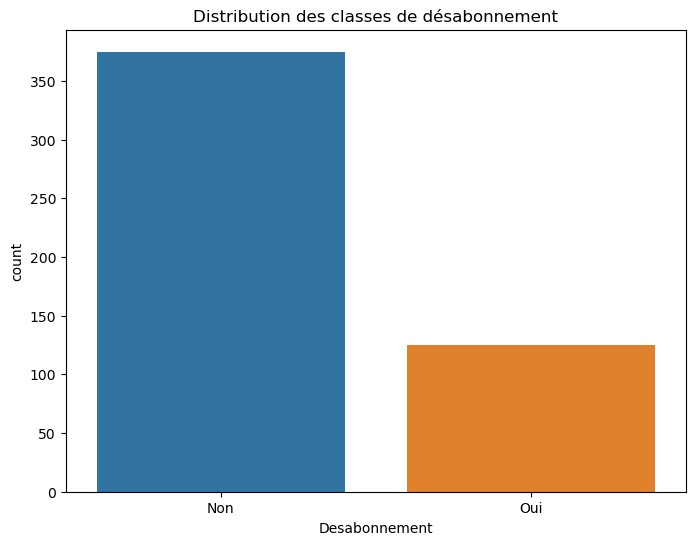

In [86]:
# Visualiser la distribution des classes de désabonnement
plt.figure(figsize=(8, 6))
sns.countplot(x='Desabonnement', data=telecom_df)
plt.title('Distribution des classes de désabonnement')
plt.show()

# Prétraitement des Données


In [87]:
# Renommer les colonnes si nécessaire
telecom_df.columns = ['ID', 'Genre', 'Senior', 'Enfants', 'Anciennete', 'Multi-lignes', 'Service Internet', 'Autres Services', 'Partenaire', 'Contrat', 'Facturation électronique', 'Mode de paiement', 'Charges mensuelles', 'Charges totales', 'Desabonnement']

# Afficher les 10 premières lignes du dataframe
telecom_df.head(5)


,ID,Genre,Senior,Enfants,Anciennete,Multi-lignes,Service Internet,Autres Services,Partenaire,Contrat,Facturation électronique,Mode de paiement,Charges mensuelles,Charges totales,Desabonnement
0,1,Femme,0,Non,1,Non,DSL,Non,Oui,Mensuel,Oui,Cheque electronique,"29,85","29,85",Non
1,2,Homme,0,Non,34,Non,DSL,Oui,Non,Annuel,Non,Cheque papier,"56,95","1889,5",Non
2,3,Homme,0,Non,2,Non,DSL,Oui,Non,Mensuel,Oui,Cheque papier,"53,85","108,15",Oui
3,4,Homme,0,Non,45,Non,DSL,Non,Non,Annuel,Non,Virement bancaire,"42,3","1840,75",Non
4,5,Femme,0,Non,2,Non,Fibre optique,Oui,Non,Mensuel,Oui,Cheque electronique,"70,7","151,65",Oui


In [88]:
telecom_df.columns

Index(['ID', 'Genre', 'Senior', 'Enfants', 'Anciennete', 'Multi-lignes',
       'Service Internet', 'Autres Services', 'Partenaire', 'Contrat',
       'Facturation électronique', 'Mode de paiement', 'Charges mensuelles',
       'Charges totales', 'Desabonnement'],
      dtype='object')

In [89]:
telecom_df.shape

(500, 15)

In [90]:
# Afficher le nombre de valeurs manquantes par colonne
missing_values = telecom_df.isnull().sum()

# Afficher les colonnes avec des valeurs manquantes
columns_with_missing_values = missing_values[missing_values > 0]

# Afficher les résultats
print("Nombre de valeurs manquantes par colonne :")
print(missing_values)

print("\nColonnes avec des valeurs manquantes :")
print(columns_with_missing_values)


Nombre de valeurs manquantes par colonne :
ID                          0
Genre                       0
Senior                      0
Enfants                     0
Anciennete                  0
Multi-lignes                0
Service Internet            0
Autres Services             0
Partenaire                  0
Contrat                     0
Facturation électronique    0
Mode de paiement            0
Charges mensuelles          1
Charges totales             2
Desabonnement               0
dtype: int64

Colonnes avec des valeurs manquantes :
Charges mensuelles    1
Charges totales       2
dtype: int64


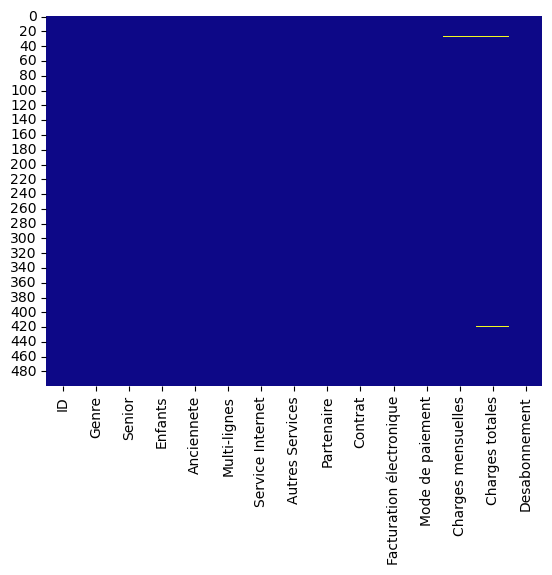

In [91]:
# Afficher une heatmap des valeurs manquantes
sns.heatmap(telecom_df.isnull(), cbar=False, cmap='plasma')

# Afficher le plot
plt.show()

In [92]:

telecom_df=telecom_df.dropna()

In [93]:
telecom_df.shape

(498, 15)

In [94]:
telecom_df[telecom_df.isnull().any(axis=1)].count()

ID                          0
Genre                       0
Senior                      0
Enfants                     0
Anciennete                  0
Multi-lignes                0
Service Internet            0
Autres Services             0
Partenaire                  0
Contrat                     0
Facturation électronique    0
Mode de paiement            0
Charges mensuelles          0
Charges totales             0
Desabonnement               0
dtype: int64

In [100]:
# Afficher les types de variables pour chaque colonne
types_variables = telecom_df.dtypes
print("Types de variables :")
print(types_variables)

# Lister les variables catégorielles
variables_categorielles = telecom_df.select_dtypes(include=['object']).columns
print("\nVariables catégorielles :")
print(variables_categorielles)

Types de variables :
ID                           int64
Genre                       object
Senior                       int64
Enfants                     object
Anciennete                   int64
Multi-lignes                object
Service Internet            object
Autres Services             object
Partenaire                  object
Contrat                     object
Facturation électronique    object
Mode de paiement            object
Charges mensuelles          object
Charges totales             object
Desabonnement               object
dtype: object

Variables catégorielles :
Index(['Genre', 'Enfants', 'Multi-lignes', 'Service Internet',
       'Autres Services', 'Partenaire', 'Contrat', 'Facturation électronique',
       'Mode de paiement', 'Charges mensuelles', 'Charges totales',
       'Desabonnement'],
      dtype='object')



# Analyse Exploratoire des Données (EDA) après prétraitement

In [98]:
# Explorer les statistiques descriptives après le prétraitement
descriptive_stats_after_preprocessing = telecom_df.describe()
descriptive_stats_after_preprocessing

,ID,Senior,Anciennete
count,498.000000,498.000000,498.000000
mean,291.919679,0.176707,31.917671
std,169.531268,0.381804,24.518281
min,1.000000,0.000000,1.000000
25%,143.500000,0.000000,8.250000
50%,293.500000,0.000000,28.000000
75%,437.750000,0.000000,55.000000
max,584.000000,1.000000,72.000000


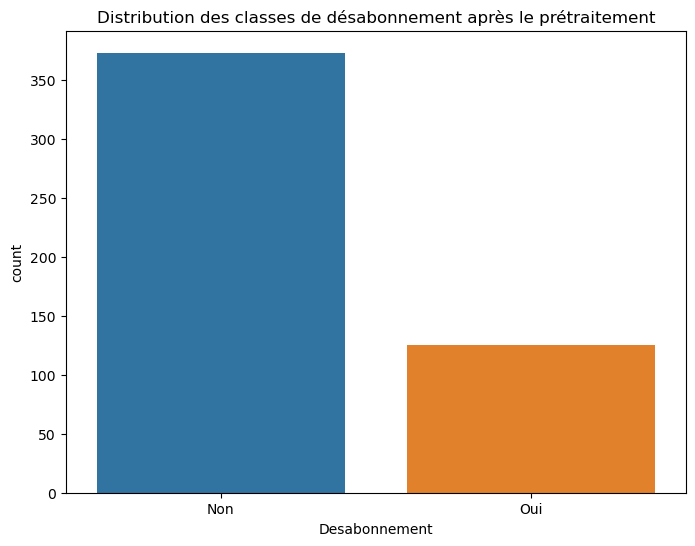

In [99]:
# Visualiser la distribution des classes de désabonnement après le prétraitement
plt.figure(figsize=(8, 6))
sns.countplot(x='Desabonnement', data=telecom_df)
plt.title('Distribution des classes de désabonnement après le prétraitement')
plt.show()

In [ ]:
# Identifier les tendances et corrélations entre les caractéristiques après le prétraitement
correlation_matrix_after_preprocessing = telecom_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_after_preprocessing, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation après le prétraitement')
plt.show()